# 1. Cargar conjunto de datos

In [425]:
# prompt: add a dataset from github using pandas
import time
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


# URL del conjunto de datos en GitHub
url = 'https://raw.githubusercontent.com/gabrielbr19/curso-ml/refs/heads/main/tarea1/dataset.csv'

# Cargar el conjunto de datos en un DataFrame de pandas
df = pd.read_csv(url)

#2. Exploración Inicial de Datos

Utilizamos la función head() para mostrar las primeras 5 filas del dataset. Analizando las columnas mostradas, podemos ver un patrón en el que para ciertos features categóricos, se están creando columnas adicionales para cada una de las categorías de ese feature categórico principal. Cada una de estas columnas presenta un valor booleano, indicando si la instancia tiene o no como valor a esta categoría.

Realizando un análisis más profundo del dataset, observamos que este patrón se repite para una cantidad considerable de features. Estas columnas son redundantes y lo único que están haciendo es hacer al dataset más complejo, por lo que se debe encontrar una manera de eliminarlas, o reducir su cantidad.

## 2.1 Uso de Funciones

### Utilizando head()

In [426]:
print(df.head())

  Submission ID What is your age?  \
0        gMR29l   18-24 years old   
1        BkPN0e   25-34 years old   
2        W5G8jj   25-34 years old   
3        4xWgGr   35-44 years old   
4        QD27Q8   25-34 years old   

  How many cups of coffee do you typically drink per day?  \
0                                                NaN        
1                                                NaN        
2                                                NaN        
3                                                NaN        
4                                                NaN        

  Where do you typically drink coffee?  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                                  NaN   

  Where do you typically drink coffee? (At home)  \
0                                            NaN   
1                                            NaN   
2

Al correr el comando info(), nos dice que la cantidad de columnas del dataset es altísima, por lo que reducirlas pareciera ser un punto considerable. Por otro lado, podemos ver que la cantidad de instancias es bastante aceptable.

In [427]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Columns: 113 entries, Submission ID to Political Affiliation
dtypes: float64(21), object(92)
memory usage: 3.5+ MB
None


In [428]:
print(df.describe())

       What kind of flavorings do you add?  \
count                                  0.0   
mean                                   NaN   
std                                    NaN   
min                                    NaN   
25%                                    NaN   
50%                                    NaN   
75%                                    NaN   
max                                    NaN   

       What kind of flavorings do you add? (Vanilla Syrup)  \
count                                                0.0     
mean                                                 NaN     
std                                                  NaN     
min                                                  NaN     
25%                                                  NaN     
50%                                                  NaN     
75%                                                  NaN     
max                                                  NaN     

       What kind of flavor

### Utilizando tail()

## 2.3 Análisis del problema que pretenden abordar los datos

Los datos provienen de un evento virtual organizado por James Hoffmann catalogado como "Great American Coffee Taste Test". James, fue campeón mundial de barismo en 2007, y ahora además es consultor, escritor e influencer en el mundo del café. El set de datos disponible nos permite acceder a la respuesta de mas de 4000 participantes obtenidos por medio de una encuesta.


En este conjunto de datos encontramos variedad de categorías y variables de estudio. Tenemos atributos demograficos como la edad, la etnia y el género de los participantes. Además contamos con características socioeconomicas en donde podemos obtener información sobre su empleabilidad, nivel de educación, rangos de precios que han pagado o que están dispuestos a pagar por una taza de café. De igual forma los datos nos proveen información de gustos en el consumo del café de los particpantes, como el lugar donde suelen tomar café, la razón por la que lo toman, la manera en la que les gusta preparar su café, entre otros. Por último, encontramos datos relevantes de una cata a ciegas de café que los participantes realizaron, dando información característica de los cafés que probaron basado en el sabor y la experiencia sensorial que experimentaron.

Bajo este contexto, se infiere que los datos nos permite realizar clasificaciones de perfiles de personas que toman café, bajo las distintas modalidades y variables expresadas, nutriendo nuesto modelo de predicción de hábitos y posibles gustos de nuevos consumidores que definan su tendencia siempre y cuando cumplan con c

# 3. Manejo de valores nulos

## 3.1 Eliminación de atributos

Definimos una función para analizar el porcentaje de valores faltantes en las diferentes columnas

In [429]:

def column_null_percentage(df):
    # Calculate the percentage of missing values for each column
    percent_missing = df.isnull().sum() * 100 / len(df)

    # Create a DataFrame with the column names and their corresponding missing percentages
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'percent_missing': percent_missing})

    # Sort the columns by the percentage of missing values in descending order
    missing_value_df = missing_value_df.sort_values('percent_missing', ascending=False)

    # Return only the columns with missing values greater than 0
    return missing_value_df[missing_value_df['percent_missing'] > 0][['column_name', 'percent_missing']]

columns_with_highest_missing_values = column_null_percentage(df)
columns_with_highest_missing_values.head(43)

,column_name,percent_missing
What other flavoring do you use?,What other flavoring do you use?,100.000000
What kind of flavorings do you add?,What kind of flavorings do you add?,100.000000
What kind of flavorings do you add? (Vanilla Syrup),What kind of flavorings do you add? (Vanilla S...,100.000000
What kind of flavorings do you add? (Caramel Syrup),What kind of flavorings do you add? (Caramel S...,100.000000
What kind of flavorings do you add? (Hazelnut Syrup),What kind of flavorings do you add? (Hazelnut ...,100.000000
What kind of flavorings do you add? (Cinnamon (Ground or Stick)),What kind of flavorings do you add? (Cinnamon ...,100.000000
What kind of flavorings do you add? (Peppermint Syrup),What kind of flavorings do you add? (Peppermin...,100.000000
What kind of flavorings do you add? (Other),What kind of flavorings do you add? (Other),100.000000
Gender (please specify),Gender (please specify),99.703117
Where else do you purchase coffee?,Where else do you purchase coffee?,99.233053


Si tienen más de un 50% de valores faltantes, eliminamos la columna por completo. Como se puede ver, se eliminaron un total de 42 columnas:

In [430]:
def remove_columns_with_many_nulls(df, columns_with_highest_missing_values, threshold=50):
    """
    Elimina las columnas que tienen más de un porcentaje especificado de valores faltantes.

    Args:
        df (pandas.DataFrame): El DataFrame original del cual se eliminarán las columnas.
        columns_with_highest_missing_values (pandas.DataFrame): Un DataFrame con las columnas 'column_name' y 'percent_missing',
            que indican el porcentaje de valores faltantes de cada columna.
        umbral (int): El porcentaje de valores faltantes sobre el cual las columnas serán eliminadas. Predeterminado a 50.

    Returns:
        pandas.DataFrame: Un nuevo DataFrame con las columnas eliminadas.
        int: El número de columnas eliminadas.
    """
    # Filtrar las columnas que tienen más del umbral de valores faltantes
    columnas_a_eliminar = columns_with_highest_missing_values[
        columns_with_highest_missing_values['percent_missing'] > threshold
    ]['column_name'].tolist()

    # Eliminar las columnas del DataFrame original
    df_limpio = df.drop(columns=columnas_a_eliminar)

    # Devolver el DataFrame limpio y el número de columnas eliminadas
    columnas_eliminadas = len(df.columns) - len(df_limpio.columns)

    return df_limpio, columnas_eliminadas

start_time = time.time()

high_null_columns_removed, num_removed_columns = remove_columns_with_many_nulls(df, columns_with_highest_missing_values, threshold=50)

end_time = time.time()

column_removal_execution_time = end_time - start_time
print(f"Tiempo de ejecución: {column_removal_execution_time:.6f} segundos")

# Imprimir el número de columnas eliminadas
print(f'Se eliminaron un total de: {num_removed_columns} columnas')

Tiempo de ejecución: 0.002695 segundos
Se eliminaron un total de: 42 columnas


Ahora, definimos una función que nos indique el porcentaje de filas con valores faltantes, y comparamos este valor previo a la eliminación de columnas. Podemos ver que la cantidad de filas con valores faltantes se redujo en un 44%.

In [431]:
def porcentaje_filas_con_nulos(df):
  """Calcula el porcentaje de filas en un DataFrame que tienen valores faltantes.

  Args:
    df: El DataFrame de pandas.

  Returns:
    El porcentaje de filas con valores faltantes.
  """
  filas_con_nulos = df.isnull().any(axis=1).sum()
  total_filas = len(df)
  porcentaje = (filas_con_nulos / total_filas) * 100
  return porcentaje

# Ejemplo de uso (asumiendo que ya tienes el DataFrame 'df' definido)
porcentaje = porcentaje_filas_con_nulos(high_null_columns_removed)
print(f"Porcentaje de filas con faltantes (Dataset original): {porcentaje_filas_con_nulos(df):.2f}%")
print(f"Porcentaje de filas con faltantes (Con columnas eliminadas): {porcentaje_filas_con_nulos(high_null_columns_removed):.2f}%")


Porcentaje de filas con faltantes (Dataset original): 100.00%
Porcentaje de filas con faltantes (Con columnas eliminadas): 56.19%


## 3.2 Imputación por moda

Realizamos la imputación por moda a las columnas categóricas

In [432]:
def impute_categoricals_by_mode(dataframe):
    """
    Imputa solo las columnas categóricas (de tipo 'object') con la moda de cada columna.
    Las columnas numéricas no se imputan.
    
    Args:
        dataframe: El DataFrame de pandas.
    
    Returns:
        El DataFrame con los valores faltantes imputados solo en las columnas categóricas.
    """
    df_copy = dataframe.copy()
    
    for column in df_copy.columns:
        if df_copy[column].dtype != 'object':
            continue 
        mode = df_copy[column].mode()
        df_copy[column] = df_copy[column].fillna(mode.iloc[0]).infer_objects(copy=False)
    
    return df_copy

start_time = time.time()

mode_imputation = impute_categoricals_by_mode(df)

end_time = time.time()

mode_imputation_execution_time = end_time - start_time
print(f"Tiempo de ejecución: {mode_imputation_execution_time:.6f} segundos")


Tiempo de ejecución: 0.071970 segundos


C:\Users\gabrc\AppData\Local\Temp\ipykernel_5028\3821961747.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy[column] = df_copy[column].fillna(mode.iloc[0]).infer_objects(copy=False)


Luego de realizar la imputación, analizamos los porcentajes de faltantes en las diferentes columnas. De paso, podemos observar que las únicas columnas que cuentan con valores faltantes, luego de la imputación, son las que tienen a TODOS sus valores faltantes o las que son numéricas, lo cual Lo cual tiene sentido.

In [433]:
mode_imputation_column_null_percentage = column_null_percentage(mode_imputation)
mode_imputation_column_null_percentage

,column_name,percent_missing
What other flavoring do you use?,What other flavoring do you use?,100.000000
What kind of flavorings do you add?,What kind of flavorings do you add?,100.000000
What kind of flavorings do you add? (Vanilla Syrup),What kind of flavorings do you add? (Vanilla S...,100.000000
What kind of flavorings do you add? (Caramel Syrup),What kind of flavorings do you add? (Caramel S...,100.000000
What kind of flavorings do you add? (Hazelnut Syrup),What kind of flavorings do you add? (Hazelnut ...,100.000000
What kind of flavorings do you add? (Cinnamon (Ground or Stick)),What kind of flavorings do you add? (Cinnamon ...,100.000000
What kind of flavorings do you add? (Peppermint Syrup),What kind of flavorings do you add? (Peppermin...,100.000000
What kind of flavorings do you add? (Other),What kind of flavorings do you add? (Other),100.000000
Coffee C - Acidity,Coffee C - Acidity,7.199406
Coffee C - Bitterness,Coffee C - Bitterness,6.877783


## 3.3 Imputación por promedio

La imputación por promedio, se puede realizar sobre columnas numéricas. Por lo que antes de hacerlo, necesitamos asegurarnos que nuestro dataset cuente con columnas de estas características. Y como podemos ver, cuenta con 13:

In [434]:
# prompt: Crea una función que me diga la cantidad de columnas numéricas de un dataset. Sin tomar en cuenta las que son todas nulas

def count_numeric_columns(df):
  """
  Cuenta la cantidad de columnas numéricas en un DataFrame, excluyendo las que son todas nulas.

  Args:
    df: El DataFrame de pandas.

  Returns:
    La cantidad de columnas numéricas.
  """
  columnas_numericas = df.select_dtypes(include=['number']).columns
  columnas_con_datos = [col for col in columnas_numericas if df[col].notnull().any()]
  return len(columnas_con_datos)

# Ejemplo de uso (asumiendo que ya tienes el DataFrame 'df' definido)
cantidad_columnas = count_numeric_columns(df)
print(f"Cantidad de columnas numéricas (excluyendo las que son todas nulas): {cantidad_columnas}")


Cantidad de columnas numéricas (excluyendo las que son todas nulas): 13


Realizamos la imputación correspondiente y medimos su tiempo de ejecución

In [435]:
def impute_by_mean(dataframe):
    """
    Imputa los valores faltantes en un DataFrame con la media de cada columna.

    Args:
        dataframe: El DataFrame de pandas.

    Returns:
        El DataFrame con los valores faltantes imputados.
    """
    df_copy = dataframe.copy()
    for columna in df_copy.select_dtypes(include=['number']):
        df_copy[columna] = df_copy[columna].fillna(df_copy[columna].mean())
    return df_copy

start_time = time.time()

mean_imputation = impute_by_mean(df)

end_time = time.time()

mean_imputation_execution_time = end_time - start_time
print(f"Tiempo de ejecución: {mean_imputation_execution_time:.6f} segundos")


Tiempo de ejecución: 0.011592 segundos


Posterior a la imputación, verificamos que todas las columnas numéricas ya no tengan valores nulos:

In [436]:
def numeric_columns_null_percentage(dataframe):
  """
  Calcula el porcentaje de valores nulos en las columnas numéricas de un DataFrame,
  excluyendo las columnas que son todas nulas.

  Args:
    df: El DataFrame de pandas.

  Returns:
    Un DataFrame con el porcentaje de valores nulos para cada columna numérica.
  """
  columnas_numericas = dataframe.select_dtypes(include=['number']).columns
  columnas_con_datos = [col for col in columnas_numericas if dataframe[col].notnull().any()]
  porcentaje_nulos = dataframe[columnas_con_datos].isnull().mean() * 100
  return porcentaje_nulos


# Ejemplo de uso:
porcentaje_nulos = numeric_columns_null_percentage(mean_imputation)
porcentaje_nulos


Lastly, how would you rate your own coffee expertise?    0.0
Coffee A - Bitterness                                    0.0
Coffee A - Acidity                                       0.0
Coffee A - Personal Preference                           0.0
Coffee B - Bitterness                                    0.0
Coffee B - Acidity                                       0.0
Coffee B - Personal Preference                           0.0
Coffee C - Bitterness                                    0.0
Coffee C - Acidity                                       0.0
Coffee C - Personal Preference                           0.0
Coffee D - Bitterness                                    0.0
Coffee D - Acidity                                       0.0
Coffee D - Personal Preference                           0.0
dtype: float64

# 4. Normalización y Escalado de datos

Para la evaluación de las técnicas normalización y escalado de los datos, hemos tomado la decisión de realizar una pequeña modificación sobre los datasets generados en el apartado 3 de este notebook.

Con el fin de garantizar que estos datasets no contengan valores nulos que puedan provocar algún desajuste o sesgo, vamos a proceder a realizar la combinación de técnicas de manejo de valores de forma que vamos a tener los siguientes datasets:


*   Dataframe A: Imputación por moda en todas las columnas.
*   Dataframe B: Imputación por promedio en las columnas numéricas y por mode en las categóricas.



Dataframe A: Imputación por moda en todas las columnas.

In [437]:
def impute_all_by_mode(dataframe):
    df_copy = dataframe.copy()
    
    for column in df_copy.columns:
        mode = df_copy[column].mode()
        df_copy[column] = df_copy[column].fillna(mode.iloc[0])
    
    return df_copy

df_a = impute_all_by_mode(high_null_columns_removed)

C:\Users\gabrc\AppData\Local\Temp\ipykernel_5028\2983062598.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy[column] = df_copy[column].fillna(mode.iloc[0])


Dataframe B: Imputación por promedio en las columnas numéricas y por mode en las categóricas.


In [438]:
df_b = impute_by_mean(impute_categoricals_by_mode(high_null_columns_removed))


C:\Users\gabrc\AppData\Local\Temp\ipykernel_5028\3821961747.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy[column] = df_copy[column].fillna(mode.iloc[0]).infer_objects(copy=False)


Definiremos la siguiente función con el fin de tener la posibilidad de demostrar cuáles fueron los cambios de valores en las columnas numéricas de los datasets generados por medio de las técnicas de escalado.

In [439]:
def show_columns_scaled(df_original, df_scaled):
  # Seleccionar solo columnas numéricas
  num_cols = df_original.select_dtypes(include=['number']).columns

  # Filtrar las filas donde hubo transformación en columnas numéricas
  changed_rows = df_original[num_cols] != df_scaled[num_cols]
  filtered_df = df_scaled.loc[changed_rows.any(axis=1), num_cols].head(10)

  return filtered_df

## Uso de MinMaxScaler

Procedemos a definir una función que nos ayude a escalar los valores de las columnas númericas por la ténica MinMax Scaler, la cuál funciona de la manera  óptima cuando los valores tiene rangos definidos. Por ejemplo, en nuestro set de datos funciona bien con las columnas de evaluación sensorial del café y de evaluación personal del conocimiento sobre el café.

In [440]:
def scale_by_min_max_scaler(dataframe):
    """
    Escala todas las columnas numéricas de un DataFrame utilizando MinMaxScaler.

    Args:
        dataframe: El DataFrame de pandas.

    Returns:
        El DataFrame con las columnas numéricas escaladas.
    """
    df_copy = dataframe.copy()
    
    # Select numerical columns
    num_cols = df_copy.select_dtypes(include=['number']).columns
    
    # Initialize a single MinMaxScaler
    scaler = MinMaxScaler()
    
    # Apply MinMaxScaler to all numeric columns at once
    df_copy[num_cols] = scaler.fit_transform(df_copy[num_cols])
    
    return df_copy

### Sobre el Dataframe A

A continuación, vamos a proceder a ejecutar la transformación de valores númericos naturales a valores con rangos de 0 a 1 a través de la técnica MinMaxScaler.

In [441]:
df_a_min_max_scaled = scale_by_min_max_scaler(df_a)

Como resultado de la ejecución anterior, tenemos un nuevo dataset con la transformación realizada. Seguidamente podemos verificar que el escalado fue realizado correctamente.

In [442]:
show_columns_scaled(df_a, df_a_min_max_scaled)

,"Lastly, how would you rate your own coffee expertise?",Coffee A - Bitterness,Coffee A - Acidity,Coffee A - Personal Preference,Coffee B - Bitterness,Coffee B - Acidity,Coffee B - Personal Preference,Coffee C - Bitterness,Coffee C - Acidity,Coffee C - Personal Preference,Coffee D - Bitterness,Coffee D - Acidity,Coffee D - Personal Preference
0,0.666667,0.25,0.75,0.75,0.50,0.25,0.50,0.50,0.25,0.50,0.25,0.75,1.00
1,0.666667,0.25,0.75,0.75,0.50,0.25,0.50,0.50,0.25,0.50,0.25,0.75,1.00
2,0.666667,0.25,0.75,0.75,0.50,0.25,0.50,0.50,0.25,0.50,0.25,0.75,1.00
3,0.666667,0.25,0.75,0.75,0.50,0.25,0.50,0.50,0.25,0.50,0.25,0.75,1.00
4,0.666667,0.25,0.75,0.75,0.50,0.25,0.50,0.50,0.25,0.50,0.25,0.75,1.00
5,0.666667,0.25,0.75,0.75,0.50,0.25,0.50,0.50,0.25,0.50,0.25,0.75,1.00
6,0.666667,0.25,0.75,0.75,0.50,0.25,0.50,0.50,0.25,0.50,0.25,0.75,1.00
7,0.666667,0.25,0.75,0.75,0.50,0.25,0.50,0.50,0.25,0.50,0.25,0.75,1.00
8,0.666667,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75
9,0.666667,0.25,0.75,0.75,0.50,0.25,0.50,0.50,0.25,0.50,0.25,0.75,1.00


### Sobre el Dataframe B

Al igual que con el Dataframe A, procedemos a aplicar la técnica de MinMax Scaler:

In [443]:
df_b_min_max_scaled = scale_by_min_max_scaler(df_b)

Seguidamente, podemos observar las primeras 10 filas del dataframe ya escalado.

In [444]:
show_columns_scaled(df_b, df_b_min_max_scaled)

,"Lastly, how would you rate your own coffee expertise?",Coffee A - Bitterness,Coffee A - Acidity,Coffee A - Personal Preference,Coffee B - Bitterness,Coffee B - Acidity,Coffee B - Personal Preference,Coffee C - Bitterness,Coffee C - Acidity,Coffee C - Personal Preference,Coffee D - Bitterness,Coffee D - Acidity,Coffee D - Personal Preference
0,0.5215,0.285282,0.658706,0.577725,0.503307,0.305946,0.517161,0.517999,0.341709,0.516198,0.290682,0.714542,0.593982
1,0.5215,0.285282,0.658706,0.577725,0.503307,0.305946,0.517161,0.517999,0.341709,0.516198,0.290682,0.714542,0.593982
2,0.5215,0.285282,0.658706,0.577725,0.503307,0.305946,0.517161,0.517999,0.341709,0.516198,0.290682,0.714542,0.593982
3,0.5215,0.285282,0.658706,0.577725,0.503307,0.305946,0.517161,0.517999,0.341709,0.516198,0.290682,0.714542,0.593982
4,0.5215,0.285282,0.658706,0.577725,0.503307,0.305946,0.517161,0.517999,0.341709,0.516198,0.290682,0.714542,0.593982
5,0.5215,0.285282,0.658706,0.577725,0.503307,0.305946,0.517161,0.517999,0.341709,0.516198,0.290682,0.714542,0.593982
6,0.5215,0.285282,0.658706,0.577725,0.503307,0.305946,0.517161,0.517999,0.341709,0.516198,0.290682,0.714542,0.593982
7,0.5215,0.285282,0.658706,0.577725,0.503307,0.305946,0.517161,0.517999,0.341709,0.516198,0.290682,0.714542,0.593982
8,0.5215,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000
9,0.5215,0.285282,0.658706,0.577725,0.503307,0.305946,0.517161,0.517999,0.341709,0.516198,0.290682,0.714542,0.593982


## Uso de StandardScaler

Procedemos a definir una función que nos ayude a escalar los valores de las columnas númericas por la técnica Standard Scaler, la cuál funciona de la manera  óptima cuando los valores siguen una distribución estandar o tienen
 directa relación con la varianza. Nuevamente, las columnas candidatas en nuestro set de datos son las columnas de evaluación sensorial del café y de evaluación personal del conocimiento sobre el café. Más adelante realizaremos el estudio de los valores númericos, pero podemos inferir que al ser datos recolectados de forma aleatoria por medio de una encuesta podría llegar a tener una distribución uniforme.

In [445]:
def scale_by_standard_scaler(dataframe):
    """
    Escala las columnas numéricas de un DataFrame utilizando MinMaxScaler.

    Args:
        dataframe: El DataFrame de pandas.

    Returns:
        El DataFrame con las columnas numéricas escaladas.

        """
    df_copy = dataframe.copy()
    for column in df_copy.select_dtypes(include=['number']):
        scaler = StandardScaler()
        df_copy[column] = scaler.fit_transform(df_copy[[column]])

    return df_copy

### Sobre el Dataframe A

Aplicamos el escalado estándar al Dataframe A

In [446]:
df_a_standard_scaled = scale_by_standard_scaler(df_a)

Vamos a proceder a realizar la verificación de que el escalado fue efectuado correctamente.

In [447]:
show_columns_scaled(df_a, df_a_standard_scaled)

,"Lastly, how would you rate your own coffee expertise?",Coffee A - Bitterness,Coffee A - Acidity,Coffee A - Personal Preference,Coffee B - Bitterness,Coffee B - Acidity,Coffee B - Personal Preference,Coffee C - Bitterness,Coffee C - Acidity,Coffee C - Personal Preference,Coffee D - Bitterness,Coffee D - Acidity,Coffee D - Personal Preference
0,0.657999,-0.144355,0.357967,0.556793,-0.012885,-0.249111,-0.05956,-0.069526,-0.381554,-0.055422,-0.145159,0.13573,1.035512
1,0.657999,-0.144355,0.357967,0.556793,-0.012885,-0.249111,-0.05956,-0.069526,-0.381554,-0.055422,-0.145159,0.13573,1.035512
2,0.657999,-0.144355,0.357967,0.556793,-0.012885,-0.249111,-0.05956,-0.069526,-0.381554,-0.055422,-0.145159,0.13573,1.035512
3,0.657999,-0.144355,0.357967,0.556793,-0.012885,-0.249111,-0.05956,-0.069526,-0.381554,-0.055422,-0.145159,0.13573,1.035512
4,0.657999,-0.144355,0.357967,0.556793,-0.012885,-0.249111,-0.05956,-0.069526,-0.381554,-0.055422,-0.145159,0.13573,1.035512
5,0.657999,-0.144355,0.357967,0.556793,-0.012885,-0.249111,-0.05956,-0.069526,-0.381554,-0.055422,-0.145159,0.13573,1.035512
6,0.657999,-0.144355,0.357967,0.556793,-0.012885,-0.249111,-0.05956,-0.069526,-0.381554,-0.055422,-0.145159,0.13573,1.035512
7,0.657999,-0.144355,0.357967,0.556793,-0.012885,-0.249111,-0.05956,-0.069526,-0.381554,-0.055422,-0.145159,0.13573,1.035512
8,0.657999,2.032815,0.357967,0.556793,1.028743,2.139750,0.86994,0.967458,1.860076,0.862681,1.769136,0.13573,0.350817
9,0.657999,-0.144355,0.357967,0.556793,-0.012885,-0.249111,-0.05956,-0.069526,-0.381554,-0.055422,-0.145159,0.13573,1.035512


### Sobre el Dataframe B

Así como lo realizamos con el set de datos anterior, en este caso vamos a ejecutar el escalado de los datos de las columnas númericas con la técnica de StandardScaler.

In [448]:
df_b_standard_scaled = scale_by_standard_scaler(df_b)

Seguidamente, podemos observar las primeras 10 filas del dataframe ya escalado.

In [449]:
show_columns_scaled(df_b, df_b_standard_scaled)

,"Lastly, how would you rate your own coffee expertise?",Coffee A - Bitterness,Coffee A - Acidity,Coffee A - Personal Preference,Coffee B - Bitterness,Coffee B - Acidity,Coffee B - Personal Preference,Coffee C - Bitterness,Coffee C - Acidity,Coffee C - Personal Preference,Coffee D - Bitterness,Coffee D - Acidity,Coffee D - Personal Preference
0,0.0,0.000000,0.000000,0.000000,-4.625786e-16,-5.316392e-16,4.128330e-16,0.000000,0.0000,-4.077657e-16,4.253860e-16,0.000000,0.000000
1,0.0,0.000000,0.000000,0.000000,-4.625786e-16,-5.316392e-16,4.128330e-16,0.000000,0.0000,-4.077657e-16,4.253860e-16,0.000000,0.000000
2,0.0,0.000000,0.000000,0.000000,-4.625786e-16,-5.316392e-16,4.128330e-16,0.000000,0.0000,-4.077657e-16,4.253860e-16,0.000000,0.000000
3,0.0,0.000000,0.000000,0.000000,-4.625786e-16,-5.316392e-16,4.128330e-16,0.000000,0.0000,-4.077657e-16,4.253860e-16,0.000000,0.000000
4,0.0,0.000000,0.000000,0.000000,-4.625786e-16,-5.316392e-16,4.128330e-16,0.000000,0.0000,-4.077657e-16,4.253860e-16,0.000000,0.000000
5,0.0,0.000000,0.000000,0.000000,-4.625786e-16,-5.316392e-16,4.128330e-16,0.000000,0.0000,-4.077657e-16,4.253860e-16,0.000000,0.000000
6,0.0,0.000000,0.000000,0.000000,-4.625786e-16,-5.316392e-16,4.128330e-16,0.000000,0.0000,-4.077657e-16,4.253860e-16,0.000000,0.000000
7,0.0,0.000000,0.000000,0.000000,-4.625786e-16,-5.316392e-16,4.128330e-16,0.000000,0.0000,-4.077657e-16,4.253860e-16,0.000000,0.000000
8,0.0,2.024897,0.384599,0.600217,1.027856e+00,2.126386e+00,8.658032e-01,0.962495,1.8409,8.587159e-01,1.759893e+00,0.145814,0.445294
9,0.0,0.000000,0.000000,0.000000,-4.625786e-16,-5.316392e-16,4.128330e-16,0.000000,0.0000,-4.077657e-16,4.253860e-16,0.000000,0.000000


# 5. Codificación de Variables Categóricas

Antes de ahondar en nuestro estudio de las columnas categóricas de nuestro set de datos, nos gustaría realizar una pequeña muestra de  la información que obtenemos de ellas. Como se puede observar en el siguiente recuadro, tenemos información sobre formas de tomar café, información relacionada a gastos enel consumo del café, socioeconómicas como genéro, estatus laboral, afiliación política, entre otros.

In [450]:
df_a_min_max_scaled.select_dtypes(include=['object', 'category'])

,Submission ID,What is your age?,How many cups of coffee do you typically drink per day?,Where do you typically drink coffee?,How do you brew coffee at home?,What is your favorite coffee drink?,Do you usually add anything to your coffee?,"Before today's tasting, which of the following best described what kind of coffee you like?",How strong do you like your coffee?,What roast level of coffee do you prefer?,...,What is the most you've ever paid for a cup of coffee?,What is the most you'd ever be willing to pay for a cup of coffee?,Do you feel like you’re getting good value for your money when you buy coffee at a cafe?,Approximately how much have you spent on coffee equipment in the past 5 years?,Do you feel like you’re getting good value for your money with regards to your coffee equipment?,Gender,Education Level,Ethnicity/Race,Employment Status,Political Affiliation
0,gMR29l,18-24 years old,2,At home,Pour over,Regular drip coffee,No - just black,Complex,Somewhat strong,Light,...,$6-$8,$8-$10,Yes,"More than $1,000",Yes,Male,Bachelor's degree,White/Caucasian,Employed full-time,Democrat
1,BkPN0e,25-34 years old,2,At home,Pod/capsule machine (e.g. Keurig/Nespresso),Iced coffee,"Sugar or sweetener, No - just black",Light,Somewhat strong,Light,...,$6-$8,$8-$10,Yes,"More than $1,000",Yes,Male,Bachelor's degree,White/Caucasian,Employed full-time,Democrat
2,W5G8jj,25-34 years old,2,At home,Bean-to-cup machine,Regular drip coffee,No - just black,Complex,Somewhat strong,Light,...,$6-$8,$8-$10,Yes,"More than $1,000",Yes,Male,Bachelor's degree,White/Caucasian,Employed full-time,Democrat
3,4xWgGr,35-44 years old,2,At home,Coffee brewing machine (e.g. Mr. Coffee),Iced coffee,"No - just black, Cinnamon",Complex,Somewhat strong,Light,...,$6-$8,$8-$10,Yes,"More than $1,000",Yes,Male,Bachelor's degree,White/Caucasian,Employed full-time,Democrat
4,QD27Q8,25-34 years old,2,At home,Pour over,Latte,No - just black,Sweet,Somewhat strong,Light,...,$6-$8,$8-$10,Yes,"More than $1,000",Yes,Male,Bachelor's degree,White/Caucasian,Employed full-time,Democrat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4037,PA44VP,>65 years old,2,At home,Coffee brewing machine (e.g. Mr. Coffee),Regular drip coffee,"Milk, dairy alternative, or coffee creamer, Other",Chocolatey,Medium,Medium,...,$6-$8,$4-$6,No,Less than $20,Yes,Female,Master's degree,White/Caucasian,Retired,Democrat
4038,vNgpPD,>65 years old,2,At home,Coffee brewing machine (e.g. Mr. Coffee),Regular drip coffee,"Milk, dairy alternative, or coffee creamer",Nutty,Medium,Light,...,$4-$6,$2-$4,No,Less than $20,Yes,Male,Bachelor's degree,White/Caucasian,Retired,Republican
4039,g5ggRM,18-24 years old,1,"At a cafe, At home, On the go, At the office","Espresso, Pod/capsule machine (e.g. Keurig/Nes...",Latte,"No - just black, Milk, dairy alternative, or c...",Sweet,Somewhat strong,Light,...,$8-$10,More than $20,Yes,$300-$500,Yes,Male,Some college or associate's degree,White/Caucasian,Employed full-time,Democrat
4040,rlgbDN,25-34 years old,2,At home,Pour over,Iced coffee,"Milk, dairy alternative, or coffee creamer",Nutty,Somewhat strong,Medium,...,$4-$6,$8-$10,Yes,$100-$300,Yes,Male,Bachelor's degree,White/Caucasian,Unemployed,Democrat


In [451]:
def show_columns_encoded(df_original, df_encoded):
  # Seleccionar solo columnas categóricas
  num_cols = df_original.select_dtypes(include=['object', 'category']).columns

  # Filtrar las filas donde hubo transformación en columnas categóricas
  changed_rows = df_original[num_cols] != df_encoded[num_cols]
  filtered_df = df_encoded.loc[changed_rows.any(axis=1), num_cols].head(10)

  return filtered_df

## Uso de OneHotEncoder

Este método de conversión de variables categóricas a variables númericas resulta ser muy útil cuando no se quiere introducir ningún sesgo de orden nominal sobre las columnas.

In [452]:
def apply_onehot_encoder(df, columns=None):
    """
    Aplica OneHotEncoder a las columnas especificadas de un DataFrame.

    Parámetros:
        df (pd.DataFrame): DataFrame de entrada.
        columns (list, opcional): Lista de columnas categóricas a codificar con OneHotEncoder.
                                  Si es None, se aplicará a todas las columnas categóricas.

    Retorna:
        pd.DataFrame: DataFrame con las columnas codificadas.
    """
    df_encoded = df.copy()

    # Detectar automáticamente columnas categóricas si no se especifican
    if columns is None:
        columns = df_encoded.select_dtypes(include=['object', 'category']).columns.tolist()

    # Aplicar OneHotEncoder
    if columns:
        ohe = OneHotEncoder(sparse_output=False, drop='first')  # Evita multicolinealidad
        one_hot_encoded = ohe.fit_transform(df_encoded[columns])

        # Convertir a DataFrame con nombres adecuados
        one_hot_df = pd.DataFrame(one_hot_encoded,
                                  columns=ohe.get_feature_names_out(columns),
                                  index=df_encoded.index)

        # Concatenar con el DataFrame original eliminando las columnas originales
        df_encoded = pd.concat([df_encoded.drop(columns=columns), one_hot_df], axis=1)

    return df_encoded

### Aplicación al set Dataframe A con escalado estándar

A continuación ejecutamos nuestra función sobre el set especificado

In [453]:
df_a_standard_scaled_one_hot_encoded = apply_onehot_encoder(df_a_standard_scaled)

Seguidamente, vamos a revisar el dataset que se ha generado usando nuestra función de OneHotEncoder.

In [454]:
df_a_standard_scaled_one_hot_encoded.head(10)

,Where do you typically drink coffee? (At home),Where do you typically drink coffee? (At the office),Where do you typically drink coffee? (On the go),Where do you typically drink coffee? (At a cafe),Where do you typically drink coffee? (None of these),How do you brew coffee at home? (Pour over),How do you brew coffee at home? (French press),How do you brew coffee at home? (Espresso),How do you brew coffee at home? (Coffee brewing machine (e.g. Mr. Coffee)),How do you brew coffee at home? (Pod/capsule machine (e.g. Keurig/Nespresso)),...,Ethnicity/Race_Other (please specify),Ethnicity/Race_White/Caucasian,Employment Status_Employed part-time,Employment Status_Homemaker,Employment Status_Retired,Employment Status_Student,Employment Status_Unemployed,Political Affiliation_Independent,Political Affiliation_No affiliation,Political Affiliation_Republican
0,True,False,False,False,False,True,False,False,False,False,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,True,False,False,False,False,False,False,False,False,True,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,True,False,False,False,False,False,False,False,False,False,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,True,False,False,False,False,False,False,False,True,False,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,True,False,False,False,False,True,False,False,False,False,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,True,False,False,False,False,False,True,True,False,True,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,True,True,True,True,False,True,True,True,False,True,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,True,False,False,False,False,True,False,False,False,False,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,False,False,False,True,False,True,False,False,False,False,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,True,False,False,False,False,True,False,False,False,False,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Podemos notar que en este caso, utilizando la técnica de codificación suele generar más columnas a partir de una misma columna, como forma de poder manejar los múltiples valores contenidos en las categorías. En los 10 datos iniciales mostrados anteriormente, notamos que por ejemplo:


*   La columna de Afiliacion política se divide en 3
  * Republicano (TRUE/FALSE)
  * Independiente (TRUE/FALSE)
  * Demócrata (TRUE/FALSE)
  * Sin afiliación (TRUE/FALSE)
*   La columna de situación laboral también se divide en varias columnas de TRUE/FALSE



Otra curiosidad a notar es la excesiva cantidad de columnas generadas en este nuevo dataset que termina con 13940 columnas.

## Uso de LabelEnconder

El uso de esta técnica es recomendable cuando las variables categóricas responden a un orden ordinal por naturaleza ya que dependiendo del algoritmo utilizado posteriormente podrían inducir a sesgos debido a ese orden implícito que puede generar.

Una gran diferencia de esta técnica contra la de OneHotEncoder es que no genera más cantidad de columnas, y mas bien puede utilizarse para reducir la cantidad de columnas.

In [455]:
def apply_label_encoder(df, columns=None):
    """
    Aplica LabelEncoder a las columnas especificadas de un DataFrame.

    Parámetros:
        df (pd.DataFrame): DataFrame de entrada.
        columns (list, opcional): Lista de columnas categóricas a codificar con LabelEncoder.
                                  Si es None, se aplicará a todas las columnas categóricas.

    Retorna:
        pd.DataFrame: DataFrame con las columnas codificadas.
    """
    df_encoded = df.copy()

    # Detectar automáticamente columnas categóricas si no se especifican
    if columns is None:
        columns = df_encoded.select_dtypes(include=['object', 'category']).columns.tolist()

    # Aplicar LabelEncoder a cada columna categórica
    le = LabelEncoder()
    for col in columns:
        df_encoded[col] = le.fit_transform(df_encoded[col])

    return df_encoded

### Aplicacion al Dataframe B con escalado MinMax

A continuación ejecutamos nuestra función sobre el set especificado

In [456]:
df_b_min_max_scaled_label_encoded = apply_label_encoder(df_b_min_max_scaled)

Realizamos una pequeña revisión de los cambios introducidos por la técnica de codificación de etiqueta

In [457]:
df_b_min_max_scaled_label_encoded.head(10)

,Submission ID,What is your age?,How many cups of coffee do you typically drink per day?,Where do you typically drink coffee?,Where do you typically drink coffee? (At home),Where do you typically drink coffee? (At the office),Where do you typically drink coffee? (On the go),Where do you typically drink coffee? (At a cafe),Where do you typically drink coffee? (None of these),How do you brew coffee at home?,...,What is the most you've ever paid for a cup of coffee?,What is the most you'd ever be willing to pay for a cup of coffee?,Do you feel like you’re getting good value for your money when you buy coffee at a cafe?,Approximately how much have you spent on coffee equipment in the past 5 years?,Do you feel like you’re getting good value for your money with regards to your coffee equipment?,Gender,Education Level,Ethnicity/Race,Employment Status,Political Affiliation
0,3016,0,1,15,True,False,False,False,False,263,...,4,5,1,6,1,1,0,5,0,0
1,995,1,1,15,True,False,False,False,False,230,...,4,5,1,6,1,1,0,5,0,0
2,2278,1,1,15,True,False,False,False,False,0,...,4,5,1,6,1,1,0,5,0,0
3,422,2,1,15,True,False,False,False,False,12,...,4,5,1,6,1,1,0,5,0,0
4,2025,1,1,15,True,False,False,False,False,263,...,4,5,1,6,1,1,0,5,0,0
5,2146,4,1,15,True,False,False,False,False,245,...,4,5,1,6,1,1,0,5,0,0
6,2145,0,1,8,True,True,True,True,False,407,...,4,5,1,6,1,1,0,5,0,0
7,846,1,1,15,True,False,False,False,False,263,...,4,5,1,6,1,1,0,5,0,0
8,1479,1,4,0,False,False,False,True,False,263,...,4,5,1,6,1,1,0,5,0,0
9,1205,1,1,15,True,False,False,False,False,263,...,4,5,1,6,1,1,0,5,0,0


Revisando el set de datos resultante notamos cambios que no causa ruido en el set de datos original, y que más bien permiten consolidar la información de las categorías de forma simple bajo una etiqueta númerica. Reiteramos que igual debemos tener cuidado de que esta representación númerica al seguir un order ordinal no vaya a afectar de forma directa en el resultado deseado.

Haciendo un estudio sobre una variable en específico para mostrar como esta técnica funciona con mayor detalle, podemos observar que realmente le asigna una representación numérica a cada combinación posible de valores en la columna deseada. En este caso, esta mapeando el valor 'Pour Over' a 263, 'Coffee brewing machine (e.g. Mr. Coffee)' a 12, y así sucesivamente con todos los valores.

In [458]:
categories_difference_brew_coffee = df_b_min_max_scaled_label_encoded[['Submission ID', 'How do you brew coffee at home?']].merge(
    df_b_min_max_scaled_label_encoded[['Submission ID', 'How do you brew coffee at home?']],
    on='Submission ID',
    how='inner', suffixes=('_before', '_after'))
categories_difference_brew_coffee.head(10)

,Submission ID,How do you brew coffee at home?_before,How do you brew coffee at home?_after
0,3016,263,263
1,995,230,230
2,2278,0,0
3,422,12,12
4,2025,263,263
5,2146,245,245
6,2145,407,407
7,846,263,263
8,1479,263,263
9,1205,263,263


# 9. Análisis de Polars y Pandas

## Polars y cómo se compara con Pandas

Es una librería de manipulación de datos basada en el lenguaje de programación Rust. Esta provee capacidades de procesamiento de datos similares a Pandas, inclusive con sintaxis similar, pero con la diferencia que Polars está enfocada al rendimiento. Al Igual que Pandas, este se puede integrar con proyectos de Python y se integra con bibliotecas como numPy y PyArrow. Polars es especialmente útli trabajando con grandes conjuntos de datos. Similar a Pandas, representa los datos en forma de dataframes, que permiten trabajar de forma estructurada  con datos tabulares compuestos. 
Polars permite realizar tareas, que incluyen limpieza de datos, filtrado, transformación y agregación. También admite operaciones como la selección, combinación y unión de dataframes. 

En cuanto a características para mejorar el rendimiento, cuenta con evaluación perezosa, lo que significa que las operaciones sobre los dataframes construyen un plan de cálculo en lugar de ejecutarse inmediatamente, lo que mejora la eficiencia de las operaciones complejas. Polars también aprovecha el poder computacional de los procesadores multinúcleo para ejecutar operaciones de datos de forma concurrente. Esta capacidad de procesamiento paralelo es especialmente ventajosa cuando se manejan grandes conjuntos de datos y cálculos complejos. Este paralelismo también permite aprovechar al máximo el hardware moderno, lo que lo convierte en una opción atractiva para tareas de procesamiento de datos que requieren escalabilidad y velocidad.

En cuanto a comparativas de rendimiento, Polars es más eficiente en términos de energía que Pandas al manejar grandes dataframes, consumiendo menos energía en la mayoría de los casos. El consumo de energía está positivamente correlacionado con el tiempo de ejecución en ambas bibliotecas. En Pandas, también existe una correlación entre el consumo de energía y el uso de memoria, lo que no ocurre en Polars. Además, la correlación entre el consumo de energía y el uso de la CPU es casi inexistente en Polars, probablemente porque usa todos los núcleos de la CPU por defecto. Esto sugiere que Polars es una opción más eficiente y promete futuras optimizaciones.

**Todo lo descrito en esta sección fue obtenido del paper:** Nahrstedt, F., Karmouche, M., Bargieł, K., Banijamali, P., Nalini Pradeep Kumar, A., & Malavolta, I. (2024, June). An Empirical Study on the Energy Usage and Performance of Pandas and Polars Data Analysis Python Libraries. In Proceedings of the 28th International Conference on Evaluation and Assessment in Software Engineering (pp. 58-68).

## Exploración de los datos

Similar a como lo hicimos con Pandas, importamos el dataset desde Github

In [459]:
import polars as pl

# URL of the raw file in GitHub repository
url = 'https://raw.githubusercontent.com/gabrielbr19/curso-ml/refs/heads/main/tarea1/dataset.csv'

# Reading the CSV file directly from the GitHub raw URL
pl_df = pl.read_csv(url)

Utilizamos head() para ver las primeras filas del dataframe

In [460]:
pl_df.head()

Submission ID,What is your age?,How many cups of coffee do you typically drink per day?,Where do you typically drink coffee?,Where do you typically drink coffee? (At home),Where do you typically drink coffee? (At the office),Where do you typically drink coffee? (On the go),Where do you typically drink coffee? (At a cafe),Where do you typically drink coffee? (None of these),How do you brew coffee at home?,How do you brew coffee at home? (Pour over),How do you brew coffee at home? (French press),How do you brew coffee at home? (Espresso),How do you brew coffee at home? (Coffee brewing machine (e.g. Mr. Coffee)),How do you brew coffee at home? (Pod/capsule machine (e.g. Keurig/Nespresso)),How do you brew coffee at home? (Instant coffee),How do you brew coffee at home? (Bean-to-cup machine),How do you brew coffee at home? (Cold brew),How do you brew coffee at home? (Coffee extract (e.g. Cometeer)),How do you brew coffee at home? (Other),How else do you brew coffee at home?,"On the go, where do you typically purchase coffee?","On the go, where do you typically purchase coffee? (National chain (e.g. Starbucks, Dunkin))","On the go, where do you typically purchase coffee? (Local cafe)","On the go, where do you typically purchase coffee? (Drive-thru)","On the go, where do you typically purchase coffee? (Specialty coffee shop)","On the go, where do you typically purchase coffee? (Deli or supermarket)","On the go, where do you typically purchase coffee? (Other)",Where else do you purchase coffee?,What is your favorite coffee drink?,Please specify what your favorite coffee drink is,Do you usually add anything to your coffee?,Do you usually add anything to your coffee? (No - just black),"Do you usually add anything to your coffee? (Milk, dairy alternative, or coffee creamer)",Do you usually add anything to your coffee? (Sugar or sweetener),Do you usually add anything to your coffee? (Flavor syrup),Do you usually add anything to your coffee? (Other),…,Coffee B - Personal Preference,Coffee B - Notes,Coffee C - Bitterness,Coffee C - Acidity,Coffee C - Personal Preference,Coffee C - Notes,Coffee D - Bitterness,Coffee D - Acidity,Coffee D - Personal Preference,Coffee D - Notes,"Between Coffee A, Coffee B, and Coffee C which did you prefer?","Between Coffee A and Coffee D, which did you prefer?","Lastly, what was your favorite overall coffee?",Do you work from home or in person?,"In total, much money do you typically spend on coffee in a month?",Why do you drink coffee?,Why do you drink coffee? (It tastes good),Why do you drink coffee? (I need the caffeine),Why do you drink coffee? (I need the ritual),Why do you drink coffee? (It makes me go to the bathroom),Why do you drink coffee? (Other),Other reason for drinking coffee,Do you like the taste of coffee?,Do you know where your coffee comes from?,What is the most you've ever paid for a cup of coffee?,What is the most you'd ever be willing to pay for a cup of coffee?,Do you feel like you’re getting good value for your money when you buy coffee at a cafe?,Approximately how much have you spent on coffee equipment in the past 5 years?,Do you feel like you’re getting good value for your money with regards to your coffee equipment?,Gender,Gender (please specify),Education Level,Ethnicity/Race,Ethnicity/Race (please specify),Employment Status,Number of Children,Political Affiliation
str,str,str,str,bool,bool,bool,bool,bool,str,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,str,str,bool,bool,bool,bool,bool,bool,str,str,str,str,bool,bool,bool,bool,bool,…,i64,str,i64,i64,i64,str,i64,i64,i64,str,str,str,str,str,str,str,bool,bool,bool,bool,bool,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""gMR29l""","""18-24 years old""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""Regular drip coffee""",null,"""No - just black""",true,false,false,false,false,…,null,null,null,null,null,null,null,null,null,nu

Ahora, utilizamos tail() para ver las últimas filas

In [461]:
pl_df.tail()

Submission ID,What is your age?,How many cups of coffee do you typically drink per day?,Where do you typically drink coffee?,Where do you typically drink coffee? (At home),Where do you typically drink coffee? (At the office),Where do you typically drink coffee? (On the go),Where do you typically drink coffee? (At a cafe),Where do you typically drink coffee? (None of these),How do you brew coffee at home?,How do you brew coffee at home? (Pour over),How do you brew coffee at home? (French press),How do you brew coffee at home? (Espresso),How do you brew coffee at home? (Coffee brewing machine (e.g. Mr. Coffee)),How do you brew coffee at home? (Pod/capsule machine (e.g. Keurig/Nespresso)),How do you brew coffee at home? (Instant coffee),How do you brew coffee at home? (Bean-to-cup machine),How do you brew coffee at home? (Cold brew),How do you brew coffee at home? (Coffee extract (e.g. Cometeer)),How do you brew coffee at home? (Other),How else do you brew coffee at home?,"On the go, where do you typically purchase coffee?","On the go, where do you typically purchase coffee? (National chain (e.g. Starbucks, Dunkin))","On the go, where do you typically purchase coffee? (Local cafe)","On the go, where do you typically purchase coffee? (Drive-thru)","On the go, where do you typically purchase coffee? (Specialty coffee shop)","On the go, where do you typically purchase coffee? (Deli or supermarket)","On the go, where do you typically purchase coffee? (Other)",Where else do you purchase coffee?,What is your favorite coffee drink?,Please specify what your favorite coffee drink is,Do you usually add anything to your coffee?,Do you usually add anything to your coffee? (No - just black),"Do you usually add anything to your coffee? (Milk, dairy alternative, or coffee creamer)",Do you usually add anything to your coffee? (Sugar or sweetener),Do you usually add anything to your coffee? (Flavor syrup),Do you usually add anything to your coffee? (Other),…,Coffee B - Personal Preference,Coffee B - Notes,Coffee C - Bitterness,Coffee C - Acidity,Coffee C - Personal Preference,Coffee C - Notes,Coffee D - Bitterness,Coffee D - Acidity,Coffee D - Personal Preference,Coffee D - Notes,"Between Coffee A, Coffee B, and Coffee C which did you prefer?","Between Coffee A and Coffee D, which did you prefer?","Lastly, what was your favorite overall coffee?",Do you work from home or in person?,"In total, much money do you typically spend on coffee in a month?",Why do you drink coffee?,Why do you drink coffee? (It tastes good),Why do you drink coffee? (I need the caffeine),Why do you drink coffee? (I need the ritual),Why do you drink coffee? (It makes me go to the bathroom),Why do you drink coffee? (Other),Other reason for drinking coffee,Do you like the taste of coffee?,Do you know where your coffee comes from?,What is the most you've ever paid for a cup of coffee?,What is the most you'd ever be willing to pay for a cup of coffee?,Do you feel like you’re getting good value for your money when you buy coffee at a cafe?,Approximately how much have you spent on coffee equipment in the past 5 years?,Do you feel like you’re getting good value for your money with regards to your coffee equipment?,Gender,Gender (please specify),Education Level,Ethnicity/Race,Ethnicity/Race (please specify),Employment Status,Number of Children,Political Affiliation
str,str,str,str,bool,bool,bool,bool,bool,str,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,str,str,bool,bool,bool,bool,bool,bool,str,str,str,str,bool,bool,bool,bool,bool,…,i64,str,i64,i64,i64,str,i64,i64,i64,str,str,str,str,str,str,str,bool,bool,bool,bool,bool,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""PA44VP""",""">65 years old""","""2""","""At home""",true,false,false,false,false,"""Coffee brewing machine (e.g. M…",false,false,false,true,false,false,false,false,false,false,null,null,null,null,null,null,null,null,null,"""Regular drip coffee""",null,"""Milk, dairy alternative, or co…",false,true

Con la función describe(), podemos obtener información como el tipo de dato de la columna, la cantidad de valores no nulos, candidad de valores nulos, media, valor mínimo y máximo, así como los percentiles.

In [462]:
pl_df.describe()

statistic,Submission ID,What is your age?,How many cups of coffee do you typically drink per day?,Where do you typically drink coffee?,Where do you typically drink coffee? (At home),Where do you typically drink coffee? (At the office),Where do you typically drink coffee? (On the go),Where do you typically drink coffee? (At a cafe),Where do you typically drink coffee? (None of these),How do you brew coffee at home?,How do you brew coffee at home? (Pour over),How do you brew coffee at home? (French press),How do you brew coffee at home? (Espresso),How do you brew coffee at home? (Coffee brewing machine (e.g. Mr. Coffee)),How do you brew coffee at home? (Pod/capsule machine (e.g. Keurig/Nespresso)),How do you brew coffee at home? (Instant coffee),How do you brew coffee at home? (Bean-to-cup machine),How do you brew coffee at home? (Cold brew),How do you brew coffee at home? (Coffee extract (e.g. Cometeer)),How do you brew coffee at home? (Other),How else do you brew coffee at home?,"On the go, where do you typically purchase coffee?","On the go, where do you typically purchase coffee? (National chain (e.g. Starbucks, Dunkin))","On the go, where do you typically purchase coffee? (Local cafe)","On the go, where do you typically purchase coffee? (Drive-thru)","On the go, where do you typically purchase coffee? (Specialty coffee shop)","On the go, where do you typically purchase coffee? (Deli or supermarket)","On the go, where do you typically purchase coffee? (Other)",Where else do you purchase coffee?,What is your favorite coffee drink?,Please specify what your favorite coffee drink is,Do you usually add anything to your coffee?,Do you usually add anything to your coffee? (No - just black),"Do you usually add anything to your coffee? (Milk, dairy alternative, or coffee creamer)",Do you usually add anything to your coffee? (Sugar or sweetener),Do you usually add anything to your coffee? (Flavor syrup),…,Coffee B - Personal Preference,Coffee B - Notes,Coffee C - Bitterness,Coffee C - Acidity,Coffee C - Personal Preference,Coffee C - Notes,Coffee D - Bitterness,Coffee D - Acidity,Coffee D - Personal Preference,Coffee D - Notes,"Between Coffee A, Coffee B, and Coffee C which did you prefer?","Between Coffee A and Coffee D, which did you prefer?","Lastly, what was your favorite overall coffee?",Do you work from home or in person?,"In total, much money do you typically spend on coffee in a month?",Why do you drink coffee?,Why do you drink coffee? (It tastes good),Why do you drink coffee? (I need the caffeine),Why do you drink coffee? (I need the ritual),Why do you drink coffee? (It makes me go to the bathroom),Why do you drink coffee? (Other),Other reason for drinking coffee,Do you like the taste of coffee?,Do you know where your coffee comes from?,What is the most you've ever paid for a cup of coffee?,What is the most you'd ever be willing to pay for a cup of coffee?,Do you feel like you’re getting good value for your money when you buy coffee at a cafe?,Approximately how much have you spent on coffee equipment in the past 5 years?,Do you feel like you’re getting good value for your money with regards to your coffee equipment?,Gender,Gender (please specify),Education Level,Ethnicity/Race,Ethnicity/Race (please specify),Employment Status,Number of Children,Political Affiliation
str,str,str,str,str,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,str,str,str,str,f64,f64,f64,f64,…,f64,str,f64,f64,f64,str,f64,f64,f64,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""count""","""4042""","""4011""","""3949""","""3972""",3975.0,3975.0,3975.0,3975.0,3975.0,"""3657""",3661.0,3661.0,3661.0,3661.0,3661.0,3661.0,3661.0,3661.0,3661.0,3661.0,"""678""","""710""",723.0,723.0,723.0,723.0,723.0,723.0,"""31""","""3980""","""116""","""3959""",3960.0,3960.0,3960.0,3960.0,…,3773.0,"""2456""",3764.0,3751.0,3766.0,"""2383""",3767.0,3765.0,3764.0,"""2

## Mediciones de tiempo

### Remoción de columnas con muchos nulos

Utilizando Pandas

In [463]:
elapsed_time = 0.0
for i in range(100):
    start_time = time.time()

    remove_columns_with_many_nulls(df, column_null_percentage(df))

    end_time = time.time()
    elapsed_time += end_time - start_time

pandas_high_null_columns_removed_time = elapsed_time / 100
print("Tiempo de ejecución: ", pandas_high_null_columns_removed_time, "")

Tiempo de ejecución:  0.011296546459197998 


Traducimos las funciones correspondientes a Polars

In [464]:
def polars_column_null_percentage(df):
    total_rows = df.height
    
    column_names = df.columns
    
    percent_missing_list = []
    
    for col in column_names:
        null_count = df[col].null_count()
        percent_missing = (null_count * 100) / total_rows
        percent_missing_list.append(percent_missing)
    
    missing_value_df = pl.DataFrame({
        'column_name': column_names,
        'percent_missing': percent_missing_list
    })
    
    return missing_value_df.select(['column_name', 'percent_missing'])

def polars_remove_columns_with_many_nulls(df, columns_with_highest_missing_values, threshold=50):

    columns_to_remove = columns_with_highest_missing_values.filter(
        pl.col('percent_missing') > threshold
    ).select('column_name').to_series().to_list()

    clean_df = df.drop(columns_to_remove)

    return clean_df


Ejecutamos y medimos el tiempo

In [465]:
elapsed_time = 0.0
polars_high_null_columns_removed = None
for i in range(100):
    start_time = time.time()

    polars_high_null_columns_removed = polars_remove_columns_with_many_nulls(pl_df, polars_column_null_percentage(pl_df))

    end_time = time.time()
    elapsed_time += end_time - start_time

print(polars_high_null_columns_removed.describe())

polars_high_null_columns_removed_time = elapsed_time / 100
print("Tiempo de ejecución: ", polars_high_null_columns_removed_time, " segundos")

shape: (9, 73)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ statistic ┆ Submissio ┆ What is   ┆ How many  ┆ … ┆ Ethnicity ┆ Employmen ┆ Number of ┆ Politica │
│ ---       ┆ n ID      ┆ your age? ┆ cups of   ┆   ┆ /Race     ┆ t Status  ┆ Children  ┆ l Affili │
│ str       ┆ ---       ┆ ---       ┆ coffee do ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ation    │
│           ┆ str       ┆ str       ┆ you…      ┆   ┆ str       ┆ str       ┆ str       ┆ ---      │
│           ┆           ┆           ┆ ---       ┆   ┆           ┆           ┆           ┆ str      │
│           ┆           ┆           ┆ str       ┆   ┆           ┆           ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ count     ┆ 4042      ┆ 4011      ┆ 3949      ┆ … ┆ 3418      ┆ 3419      ┆ 3406      ┆ 3289     │
│ null_coun ┆ 0         ┆ 31        ┆ 93        ┆ … ┆ 624       ┆ 623       

### Imputación por moda y promedio

Con Pandas

In [466]:
elapsed_time = 0.0
pandas_mean_mode_imputation = None
for i in range(100):
    start_time = time.time()

    pandas_mean_mode_imputation = impute_by_mean(impute_categoricals_by_mode(high_null_columns_removed))

    end_time = time.time()
    elapsed_time += end_time - start_time

pandas_mode_and_mean_imputation_time = elapsed_time / 100
print("Tiempo de ejecución promedio: ", pandas_mode_and_mean_imputation_time, " segundos")

C:\Users\gabrc\AppData\Local\Temp\ipykernel_5028\3821961747.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy[column] = df_copy[column].fillna(mode.iloc[0]).infer_objects(copy=False)
C:\Users\gabrc\AppData\Local\Temp\ipykernel_5028\3821961747.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy[column] = df_copy[column].fillna(mode.iloc[0]).infer_objects(copy=False)
C:\Users\gabrc\AppData\Local\Temp\ipykernel_5028\3821961747.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change i

Tiempo de ejecución promedio:  0.041822195053100586  segundos


C:\Users\gabrc\AppData\Local\Temp\ipykernel_5028\3821961747.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy[column] = df_copy[column].fillna(mode.iloc[0]).infer_objects(copy=False)
C:\Users\gabrc\AppData\Local\Temp\ipykernel_5028\3821961747.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy[column] = df_copy[column].fillna(mode.iloc[0]).infer_objects(copy=False)
C:\Users\gabrc\AppData\Local\Temp\ipykernel_5028\3821961747.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change i

Traducimos las funciones necesarias a Polars

In [467]:

def polars_impute_by_mean(dataframe):
    df_copy = dataframe.clone()
    
    # Get numeric columns
    numeric_cols = [col for col in df_copy.columns if df_copy[col].dtype in (pl.Int64, pl.Int32, pl.Float64, pl.Float32)]
    
    imputed_columns = []
    for column_name in numeric_cols:
        mean_value = df_copy[column_name].mean()
        imputed_column = pl.col(column_name).fill_null(mean_value)
        imputed_columns.append(imputed_column.alias(column_name))  
    
    return df_copy.with_columns(imputed_columns)

def polars_impute_categoricals_by_mode(dataframe):
    df_copy = dataframe.clone()

    # Get categorical columns (non-numeric columns)
    categorical_cols = [col for col in df_copy.columns if df_copy[col].dtype not in (pl.Int64, pl.Int32, pl.Float64, pl.Float32)]

    imputed_columns = []
    for column_name in categorical_cols:
        mode_value = df_copy[column_name].mode()
        imputed_column = pl.col(column_name).fill_null(mode_value)
        imputed_columns.append(imputed_column.alias(column_name)) 

    return df_copy.with_columns(imputed_columns)

Ejecutamos y medimos el tiempo

In [468]:
elapsed_time = 0.0
polars_mean_mode_imputation = None
for i in range(100):
    start_time = time.time()

    polars_mean_mode_imputation = polars_impute_by_mean(polars_impute_categoricals_by_mode(polars_high_null_columns_removed))

    end_time = time.time()
    elapsed_time += end_time - start_time

    
print(polars_mean_mode_imputation.describe())
polars_mode_and_mean_imputation_time = elapsed_time / 100
print("Tiempo de ejecución: ", polars_mode_and_mean_imputation_time, " segundos")

shape: (9, 73)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ statistic ┆ Submissio ┆ What is   ┆ How many  ┆ … ┆ Ethnicity ┆ Employmen ┆ Number of ┆ Politica │
│ ---       ┆ n ID      ┆ your age? ┆ cups of   ┆   ┆ /Race     ┆ t Status  ┆ Children  ┆ l Affili │
│ str       ┆ ---       ┆ ---       ┆ coffee do ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ation    │
│           ┆ str       ┆ str       ┆ you…      ┆   ┆ str       ┆ str       ┆ str       ┆ ---      │
│           ┆           ┆           ┆ ---       ┆   ┆           ┆           ┆           ┆ str      │
│           ┆           ┆           ┆ str       ┆   ┆           ┆           ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ count     ┆ 4042      ┆ 4042      ┆ 4042      ┆ … ┆ 4042      ┆ 4042      ┆ 4042      ┆ 4042     │
│ null_coun ┆ 0         ┆ 0         ┆ 0         ┆ … ┆ 0         ┆ 0         

### Escalado por MinMax a DF imputado por moda y promedio

Con Pandas

In [469]:
elapsed_time = 0.0
for i in range(100):
    start_time = time.time()

    scale_by_min_max_scaler(pandas_mean_mode_imputation)

    end_time = time.time()
    elapsed_time += end_time - start_time

pandas_min_max_scaler_time = elapsed_time / 100
print("Tiempo de ejecución: ", pandas_min_max_scaler_time, " segundos")

Tiempo de ejecución:  0.0034813499450683594  segundos


Traducimos la funcion de escalado MinMax a Polars. En este caso, Scikit-learn no soporta polars, por lo que el escalado se va a hacer a mano.

In [ ]:
def polars_scale_by_min_max_scaler(dataframe):
    """
    Escala todas las columnas numéricas de un DataFrame utilizando MinMaxScaler.

    Args:
        dataframe: El DataFrame de Polars.

    Returns:
        El DataFrame con las columnas numéricas escaladas.
    """
    # Create a copy to avoid modifying the original DataFrame
    df_copy = dataframe.clone()

    # Identify numeric columns
    numeric_col_names = [col for col in df_copy.columns if df_copy[col].dtype in (pl.Int64, pl.Int32, pl.Float64, pl.Float32)]
    
    # Collect expressions for scaled columns
    scaling_exprs = []
    for column_name in numeric_col_names:
        # Calcula los valores mínimos y máximos primero
        min_val = df_copy[column_name].min()
        max_val = df_copy[column_name].max()
        
        # Evita la división por cero si min y max son iguales
        if min_val == max_val:
            # Si todos los valores son iguales, establecemos todo a 0 o 0.5
            scaled_column = pl.lit(0.5).alias(column_name)
        else:
            # Aplica la fórmula de escalado
            scaled_column = ((pl.col(column_name) - min_val) / (max_val - min_val)).alias(column_name)
        
        scaling_exprs.append(scaled_column)

    # Aplica todas las transformaciones de una vez
    return df_copy.with_columns(scaling_exprs)

Ejecutamos y medimos el tiempo

In [471]:
elapsed_time = 0.0
for i in range(100):
    start_time = time.time()

    polars_scale_by_min_max_scaler(polars_mean_mode_imputation)

    end_time = time.time()
    elapsed_time += end_time - start_time

polars_min_max_scaler_time = elapsed_time / 100
print("Tiempo de ejecución: ", polars_min_max_scaler_time, " segundos")

Tiempo de ejecución:  0.02314849615097046  segundos


### Escalado Estándar a DF imputado por moda y promedio

Con Pandas

In [472]:
elapsed_time = 0.0
for i in range(100):
    start_time = time.time()

    scale_by_standard_scaler(pandas_mean_mode_imputation)

    end_time = time.time()
    elapsed_time += end_time - start_time

pandas_standard_scaler_time = elapsed_time / 100
print("Tiempo de ejecución: ", pandas_standard_scaler_time, " segundos")

Tiempo de ejecución:  0.018605871200561522  segundos


Traducimos el StandardScaler a Polars

In [473]:
def polars_scale_by_standard_scaler(dataframe):
    """
    Escala las columnas numéricas de un DataFrame utilizando StandardScaler de manera paralela.

    Args:
        dataframe: El DataFrame de Polars.

    Returns:
        El DataFrame con las columnas numéricas escaladas.
    """
    df_copy = dataframe.clone()
    
    # Get numeric column names
    numeric_cols = [col for col in df_copy.columns if df_copy[col].dtype in (pl.Int64, pl.Int32, pl.Float64, pl.Float32)]
    
    if not numeric_cols:
        return df_copy
    
    # Compute all means and standard deviations in one go
    stats = df_copy.select([
        pl.col(col).mean().alias(f"{col}_mean") for col in numeric_cols
    ] + [
        pl.col(col).std().alias(f"{col}_std") for col in numeric_cols
    ])
    
    # Extract the statistics as a dictionary for easier access
    stats_dict = stats.row(0, named=True)
    
    # Create scaling expressions for all columns
    scaling_exprs = []
    for col in numeric_cols:
        mean_val = stats_dict[f"{col}_mean"]
        stddev_val = stats_dict[f"{col}_std"]
        
        # Avoid division by zero
        if stddev_val == 0:
            scaled_column = pl.lit(0).alias(col)
        else:
            scaled_column = ((pl.col(col) - mean_val) / stddev_val).alias(col)
        
        scaling_exprs.append(scaled_column)
    
    # Apply all transformations at once
    return df_copy.with_columns(scaling_exprs)

In [474]:
elapsed_time = 0.0
for i in range(100):
    start_time = time.time()

    polars_scale_by_standard_scaler(polars_mean_mode_imputation)

    end_time = time.time()
    elapsed_time += end_time - start_time

polars_standard_scaler_time = elapsed_time / 100
print("Tiempo de ejecución: ", polars_standard_scaler_time, " segundos")

Tiempo de ejecución:  0.023457319736480714  segundos


### Resultados

#### Rendimiento

En 3 de los 4 casos analizados, se pudo observar que fue ampliamente superior. En la remoción de columnas con muchos nulos y en el escalado estándar, fue más de un 90% más rápido que Pandas. En la prueba del escalado MinMax, más de un 50% más rápido. Por otro lado, Pandas fue superior a Polars en alrededor un 25%, en el escalado MinMax.

Para graficar las diferencias en tiempo de ejecución entre Pandas y Polars, definimos la siguiente función utilizando MatPlotLib:

In [475]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

def compare_execution_time_graph(time_code_1, time_code_2, graph_title):
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    
    codes = ['Pandas', 'Polars']
    times = [time_code_1, time_code_2]
    
    x_pos = np.arange(len(codes))
    width = 0.5 
    
    plt.bar(x_pos, times, color=['blue', 'green'], width=width)
    
    plt.xticks(x_pos, codes)
    
    plt.xlabel('Librería')
    plt.ylabel('Execution Time (seconds)')
    plt.title(graph_title)
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.subplot(1, 2, 2)
    
    plt.axis('off')
    
    # Create the text content
    textstr = '\n'.join((
        'COMPARACIÓN DE TIEMPO DE EJECUCIÓN',
        '-----------------------',
        f'Pandas: {time_code_1:.4f} segundos',
        f'Polars: {time_code_2:.4f} segundos',
        '-----------------------',
        f'Diferencia absoluta: {abs(time_code_1 - time_code_2):.4f} seconds',
        '-----------------------',
        f'Polars fue {(1 - time_code_2/time_code_1)*100:.1f}% más rápido' if time_code_1 > time_code_2 else
        f'Pandas fue {(1 - time_code_1/time_code_2)*100:.1f}% más rápido'
    ))
    
    # Place the text box in the center of the right subplot
    props = dict(boxstyle='round', facecolor='lightgray', alpha=0.8)
    plt.text(0.5, 0.5, textstr, fontsize=12,
             verticalalignment='center', horizontalalignment='center', 
             bbox=props, family='monospace')
    
    # Ensure there's enough margin
    plt.tight_layout()
    
    # Show the plot
    plt.show()

Visualizamos la comparación de rendimiento para la Remoción de columnas con más del 50% de valores nulos

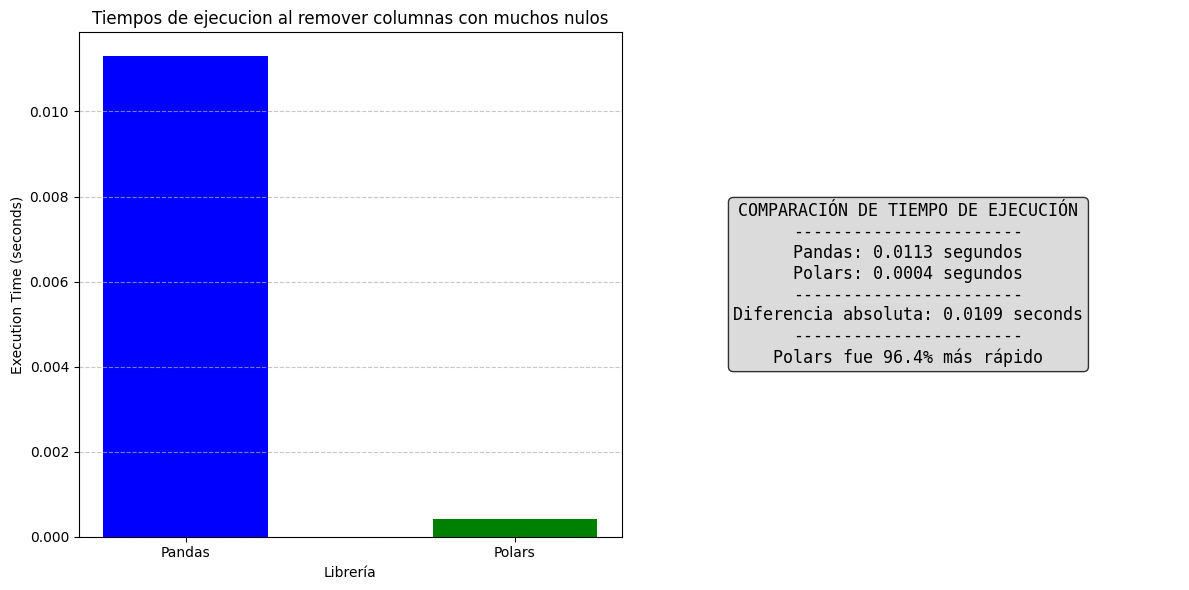

In [476]:
compare_execution_time_graph(pandas_high_null_columns_removed_time, polars_high_null_columns_removed_time, "Tiempos de ejecucion al remover columnas con muchos nulos")

Visualizamos la comparación de rendimiento para la imputación por moda para variables categóricas, en conjunto de la imputación por media para variables numéricas

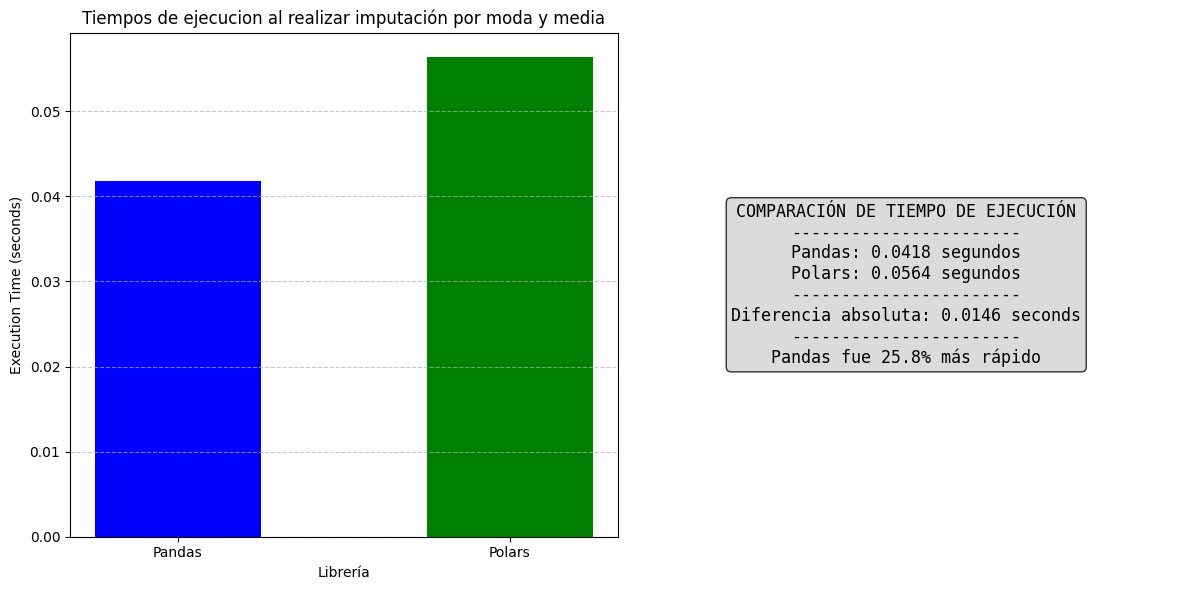

In [477]:
compare_execution_time_graph(pandas_mode_and_mean_imputation_time, polars_mode_and_mean_imputation_time, "Tiempos de ejecucion al realizar imputación por moda y media")

Visualizamos la comparación de rendimiento para el escalado MinMax para el dataset imputado por moda y media

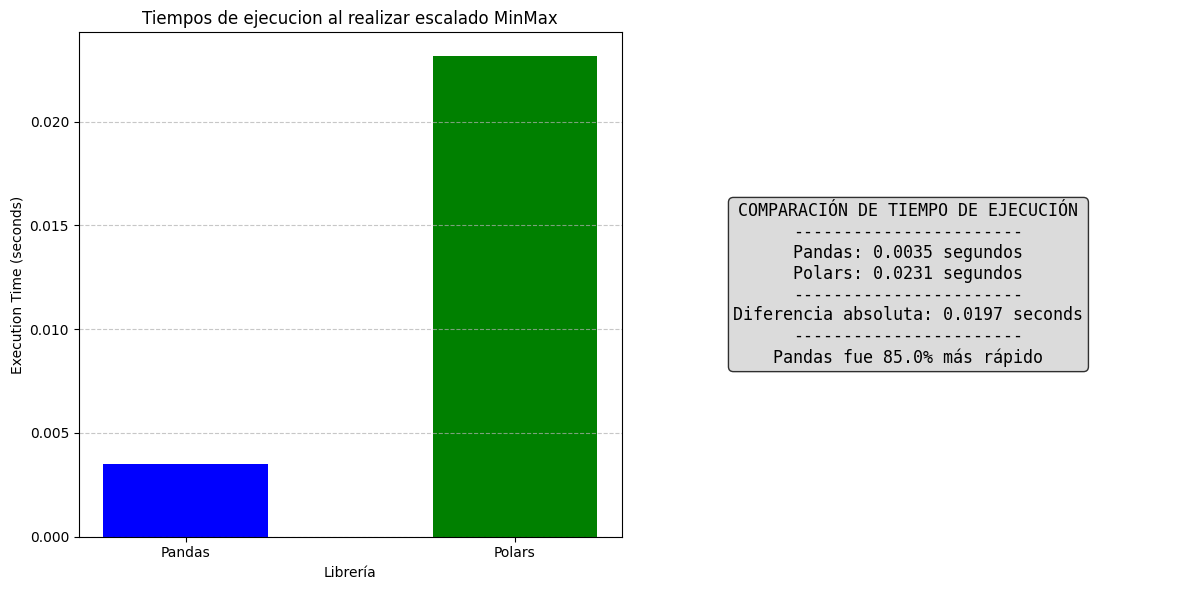

In [478]:
compare_execution_time_graph(pandas_min_max_scaler_time, polars_min_max_scaler_time, "Tiempos de ejecucion al realizar escalado MinMax")

Visualizamos la comparación de rendimiento para el escalado MinMax para el dataset imputado por moda y media

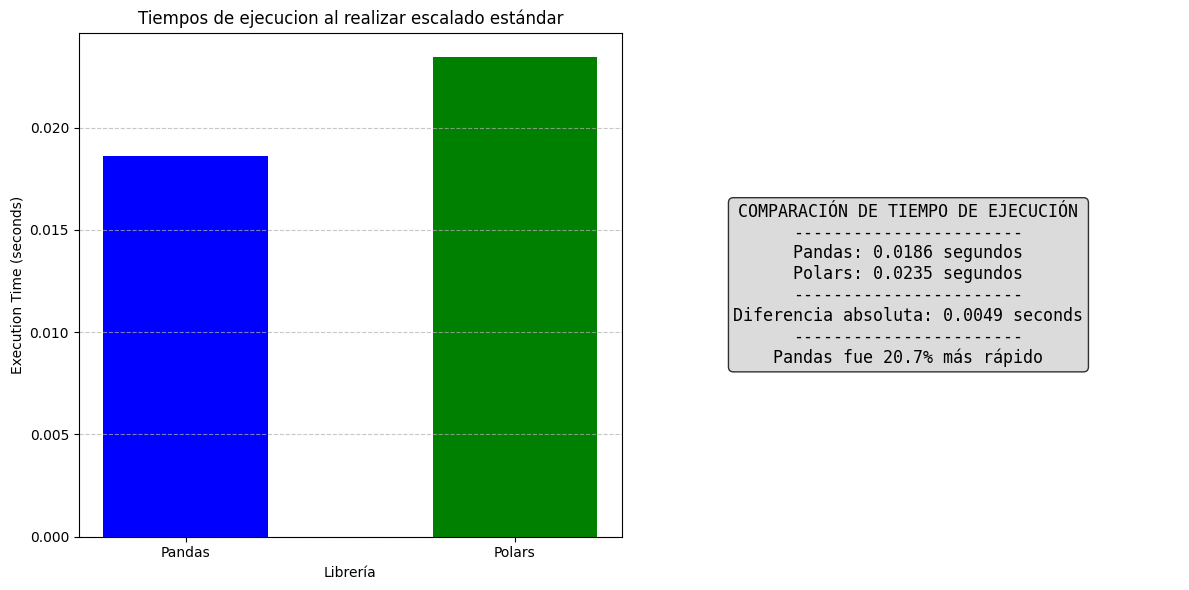

In [479]:
compare_execution_time_graph(pandas_standard_scaler_time, polars_standard_scaler_time, "Tiempos de ejecucion al realizar escalado estándar")